In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

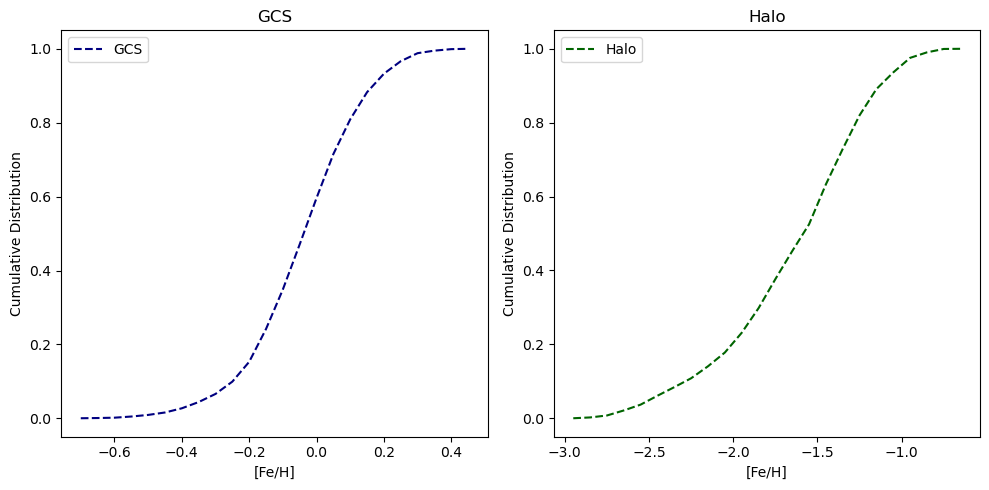

In [2]:
# (a)
data = pd.read_csv('/Users/sehalee/Downloads/abundanceTable.txt', sep='\t')

fe_h_gcs = data.iloc[:, 0]
fractions_gcs = data.iloc[:, 1]
fe_h_halo = data.iloc[:, 2]
fractions_halo = data.iloc[:, 3]

cumulative_gcs = np.cumsum(fractions_gcs)
cumulative_gcs_normalized = cumulative_gcs / cumulative_gcs.iloc[-1]
cumulative_halo = np.cumsum(fractions_halo)
cumulative_halo_normalized = cumulative_halo / cumulative_halo.iloc[-1]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(fe_h_gcs, cumulative_gcs_normalized, label='GCS', color='navy',linestyle='--')
ax[0].set_xlabel('[Fe/H]')
ax[0].set_ylabel('Cumulative Distribution')
ax[0].title.set_text('GCS')
ax[0].legend()

ax[1].plot(fe_h_halo, cumulative_halo_normalized, label='Halo', color='darkgreen',linestyle='--')
ax[1].set_xlabel('[Fe/H]')
ax[1].set_ylabel('Cumulative Distribution')
ax[1].title.set_text('Halo')
ax[1].legend()

plt.tight_layout()
plt.show()

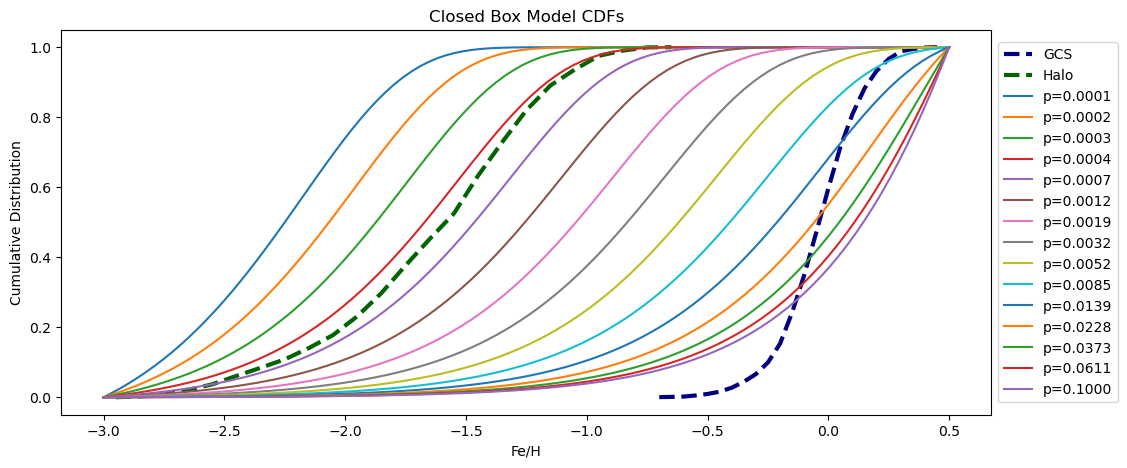

In [3]:
# (b) again but in fe_h


def closed_box_cdf(fe_h_,p,Z0=0): # (12.37)
    # log10(Z/Z_sun) = [Fe/H], Z_sun = 0.015
    Z = 0.015 * 10 ** fe_h_
    return 1 - np.exp((Z0-Z) / p)

plt.figure(figsize=(12,5))
plt.plot(fe_h_gcs, cumulative_gcs_normalized, label='GCS', color='navy', linestyle='--',linewidth=3)
plt.plot(fe_h_halo, cumulative_halo_normalized, label='Halo', color='darkgreen', linestyle='--',linewidth=3)

p_value = np.logspace(-4, -1, 15)
FeH_halo = np.linspace(-3, 0.5, 100)

for p in p_value:
    closed_box_norm = (closed_box_cdf(FeH_halo, p)-closed_box_cdf(FeH_halo[0],p))/(closed_box_cdf(FeH_halo[-1],p)-closed_box_cdf(FeH_halo[0],p))
    plt.plot(FeH_halo, closed_box_norm, label=f'p={p:.4f}')

    
plt.xlabel('Fe/H')
plt.ylabel('Cumulative Distribution')
plt.title('Closed Box Model CDFs')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


/var/folders/6m/zf_f5yss4dxc7yj9tl4kmfnc0000gn/T/ipykernel_82894/3978194460.py:3: RuntimeWarning: invalid value encountered in log
  return -np.log(1-(Z /p))


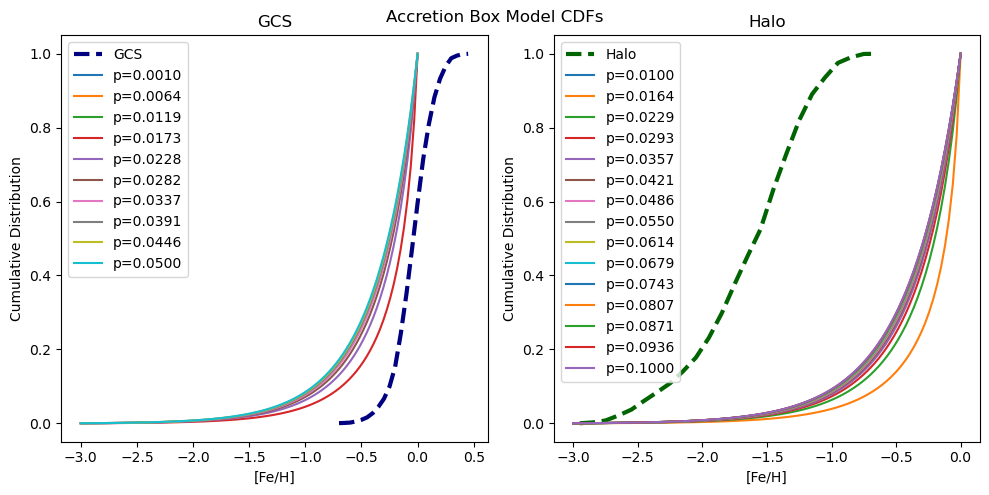

In [48]:
# 3b
def accretion_cdf(fe_h_,p): # (12.53)
    Z = 0.015 * 10 ** fe_h_
    return -np.log(1-(Z /p))

p_gcs_max = 5e-2
p_halo_max = 1e-1

p_gcs = np.linspace(1e-3, p_gcs_max, 10)
p_halo = np.linspace(1e-2, p_halo_max, 15)
FeH_gcs = np.linspace(-3, 1e-30, 100)
FeH_halo = np.linspace(-3, 1e-30, 100)
#truncated FeH range to avoid negative values inside the log

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(fe_h_gcs, cumulative_gcs_normalized, label='GCS', color='navy',linestyle='--',linewidth=3)
ax[0].set_xlabel('[Fe/H]')
ax[0].set_ylabel('Cumulative Distribution')
ax[0].title.set_text('GCS')
ax[0].legend()

ax[1].plot(fe_h_halo, cumulative_halo_normalized, label='Halo', color='darkgreen',linestyle='--',linewidth=3)
ax[1].set_xlabel('[Fe/H]')
ax[1].set_ylabel('Cumulative Distribution')
ax[1].title.set_text('Halo')
ax[1].legend()

for p in p_gcs:
    accretion_cdf_norm = (accretion_cdf(FeH_gcs, p)-accretion_cdf(FeH_gcs[0],p))/(accretion_cdf(FeH_gcs[-1],p)-accretion_cdf(FeH_gcs[0],p))
    ax[0].plot(FeH_gcs, accretion_cdf_norm, label=f'p={p:.4f}')
    ax[0].legend()


for p in p_halo:
    accretion_cdf_norm = (accretion_cdf(FeH_halo, p)-accretion_cdf(FeH_halo[0],p))/(accretion_cdf(FeH_halo[-1],p)-accretion_cdf(FeH_halo[0],p))
    ax[1].plot(FeH_halo, accretion_cdf_norm, label=f'p={p:.4f}')
    ax[1].legend()

plt.tight_layout()
plt.suptitle('Accretion Box Model CDFs')
plt.show()


/var/folders/6m/zf_f5yss4dxc7yj9tl4kmfnc0000gn/T/ipykernel_82894/2509338294.py:7: RuntimeWarning: overflow encountered in exp
  return 1 - np.exp((Z0-Z) / p)
/var/folders/6m/zf_f5yss4dxc7yj9tl4kmfnc0000gn/T/ipykernel_82894/3250826959.py:15: RuntimeWarning: invalid value encountered in subtract
  closed_box_norm = (closed_box_cdf(FeH_halo, p, Z0)-closed_box_cdf(FeH_halo[0],p,Z0))/(closed_box_cdf(FeH_halo[-1],p,Z0)-closed_box_cdf(FeH_halo[0],p,Z0)+1e-30)
/var/folders/6m/zf_f5yss4dxc7yj9tl4kmfnc0000gn/T/ipykernel_82894/3250826959.py:15: RuntimeWarning: invalid value encountered in scalar subtract
  closed_box_norm = (closed_box_cdf(FeH_halo, p, Z0)-closed_box_cdf(FeH_halo[0],p,Z0))/(closed_box_cdf(FeH_halo[-1],p,Z0)-closed_box_cdf(FeH_halo[0],p,Z0)+1e-30)
/var/folders/6m/zf_f5yss4dxc7yj9tl4kmfnc0000gn/T/ipykernel_82894/3250826959.py:15: RuntimeWarning: invalid value encountered in divide
  closed_box_norm = (closed_box_cdf(FeH_halo, p, Z0)-closed_box_cdf(FeH_halo[0],p,Z0))/(closed_box_cdf

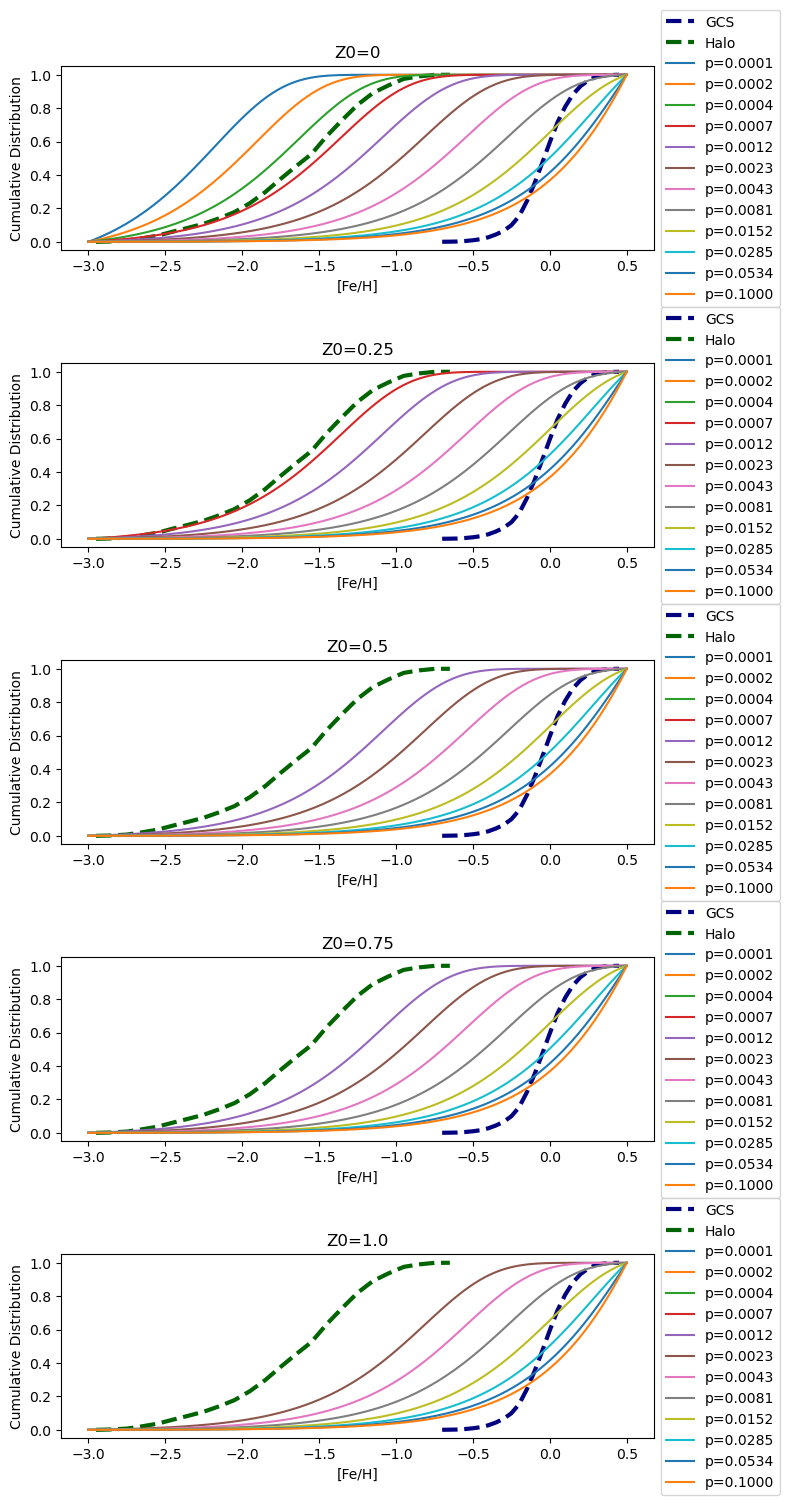

In [57]:
# (C)
p_value = np.logspace(-4, -1, 12)
FeH_halo = np.linspace(-3, 0.5, 100)
Z0_values = [0, 0.25, 0.5, 0.75, 1.0]

# 5 subplots for each Z0 value
fig, ax = plt.subplots(5,1, figsize=(8,15))

for i, Z0 in enumerate(Z0_values):
    ax[i].plot(fe_h_gcs, cumulative_gcs_normalized, label='GCS', color='navy', linestyle='--',linewidth=3)
    ax[i].plot(fe_h_halo, cumulative_halo_normalized, label='Halo', color='darkgreen', linestyle='--',linewidth=3)
    for p in p_value:
        closed_box_norm = (closed_box_cdf(FeH_halo, p, Z0)-closed_box_cdf(FeH_halo[0],p,Z0))/(closed_box_cdf(FeH_halo[-1],p,Z0)-closed_box_cdf(FeH_halo[0],p,Z0))
        ax[i].plot(FeH_halo, closed_box_norm, label=f'p={p:.4f}')
        ax[i].legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
    ax[i].set_xlabel('[Fe/H]')
    ax[i].set_ylabel('Cumulative Distribution')
    ax[i].title.set_text(f'Z0={Z0}')

plt.tight_layout()
plt.show()



/var/folders/6m/zf_f5yss4dxc7yj9tl4kmfnc0000gn/T/ipykernel_82894/3088633596.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.plot(Z, closed_box_cdf(np.log10(Z/0.015), p), label=f'p={p:.4f}')


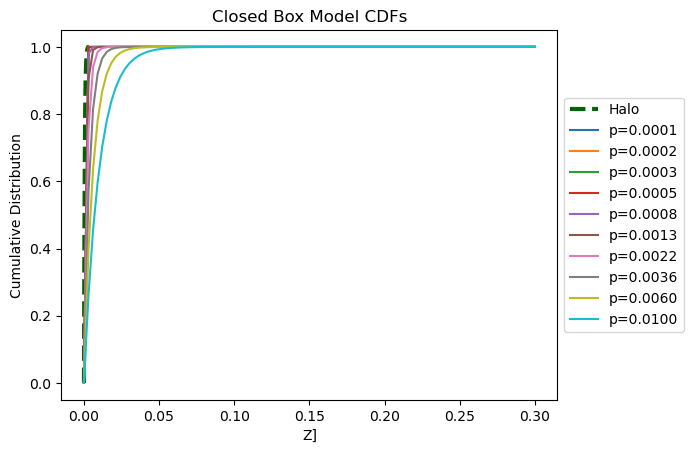

In [65]:
#(d)
# Plot the cumulative halo data and your obtained values from the closed box model over the range Z = [0, 0.3]. Assume Z0 = 0 for this question and comment on the fit (consider again p to be a free parameter).

Z = np.linspace(0, 0.3, 100)

def closed_box_cdf(fe_h_,p,Z0=0): # (12.37)
    # log10(Z/Z_sun) = [Fe/H], Z_sun = 0.015
    Z = 0.015 * 10 ** fe_h_
    return 1 - np.exp((Z0-Z) / p)

p_values = np.logspace(-4, -2, 10)

plt.plot(0.015*10**fe_h_halo, cumulative_halo_normalized, label='Halo', color='darkgreen', linestyle='--',linewidth=3)
for p in p_values:
    plt.plot(Z, closed_box_cdf(np.log10(Z/0.015), p), label=f'p={p:.4f}')
    plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Z]')
plt.ylabel('Cumulative Distribution')
plt.title('Closed Box Model CDFs')
plt.show()

